# Sentiment Analysis

In [5]:
# using Anaconda's base env
# import torch
# import torchtext

In [1]:
# https://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sentiment_helpers import *
from KRCC import *
import datetime


In [2]:
path = "Processed Datasets/"

In [4]:
# update as more files are added

# health orgs

healthorg = pd.read_excel(path + "healthorg.xlsx", index_col=0)
healthorg = sentimentanalysis(healthorg, "tweet")

# left news

leftnews = pd.read_excel(path + "leftnews.xlsx", index_col=0)
leftnews = sentimentanalysis(leftnews, "tweet")

# right news

rightnews = pd.read_excel(path + "rightnews.xlsx", index_col=0)
rightnews = sentimentanalysis(rightnews, "tweet")



In [9]:
# right ind

rightind = pd.read_excel(path + "rightind.xlsx", index_col=0)
rightind = sentimentanalysis(rightind, 'tweet')

# left ind

leftind = pd.read_excel(path + "leftind.xlsx", index_col=0)
leftind = sentimentanalysis(leftind, 'tweet')

# Celebrities

celebrities = pd.read_excel(path + "celebrities.xlsx", index_col=0)
celebrities = sentimentanalysis(celebrities, "tweet")

In [10]:
# fake

fake = pd.read_excel(path + "fake.xlsx", index_col=0)
fake = sentimentanalysis(fake, 'text')

# real

real = pd.read_excel(path + "real.xlsx", index_col=0)
real = sentimentanalysis(real, 'text')

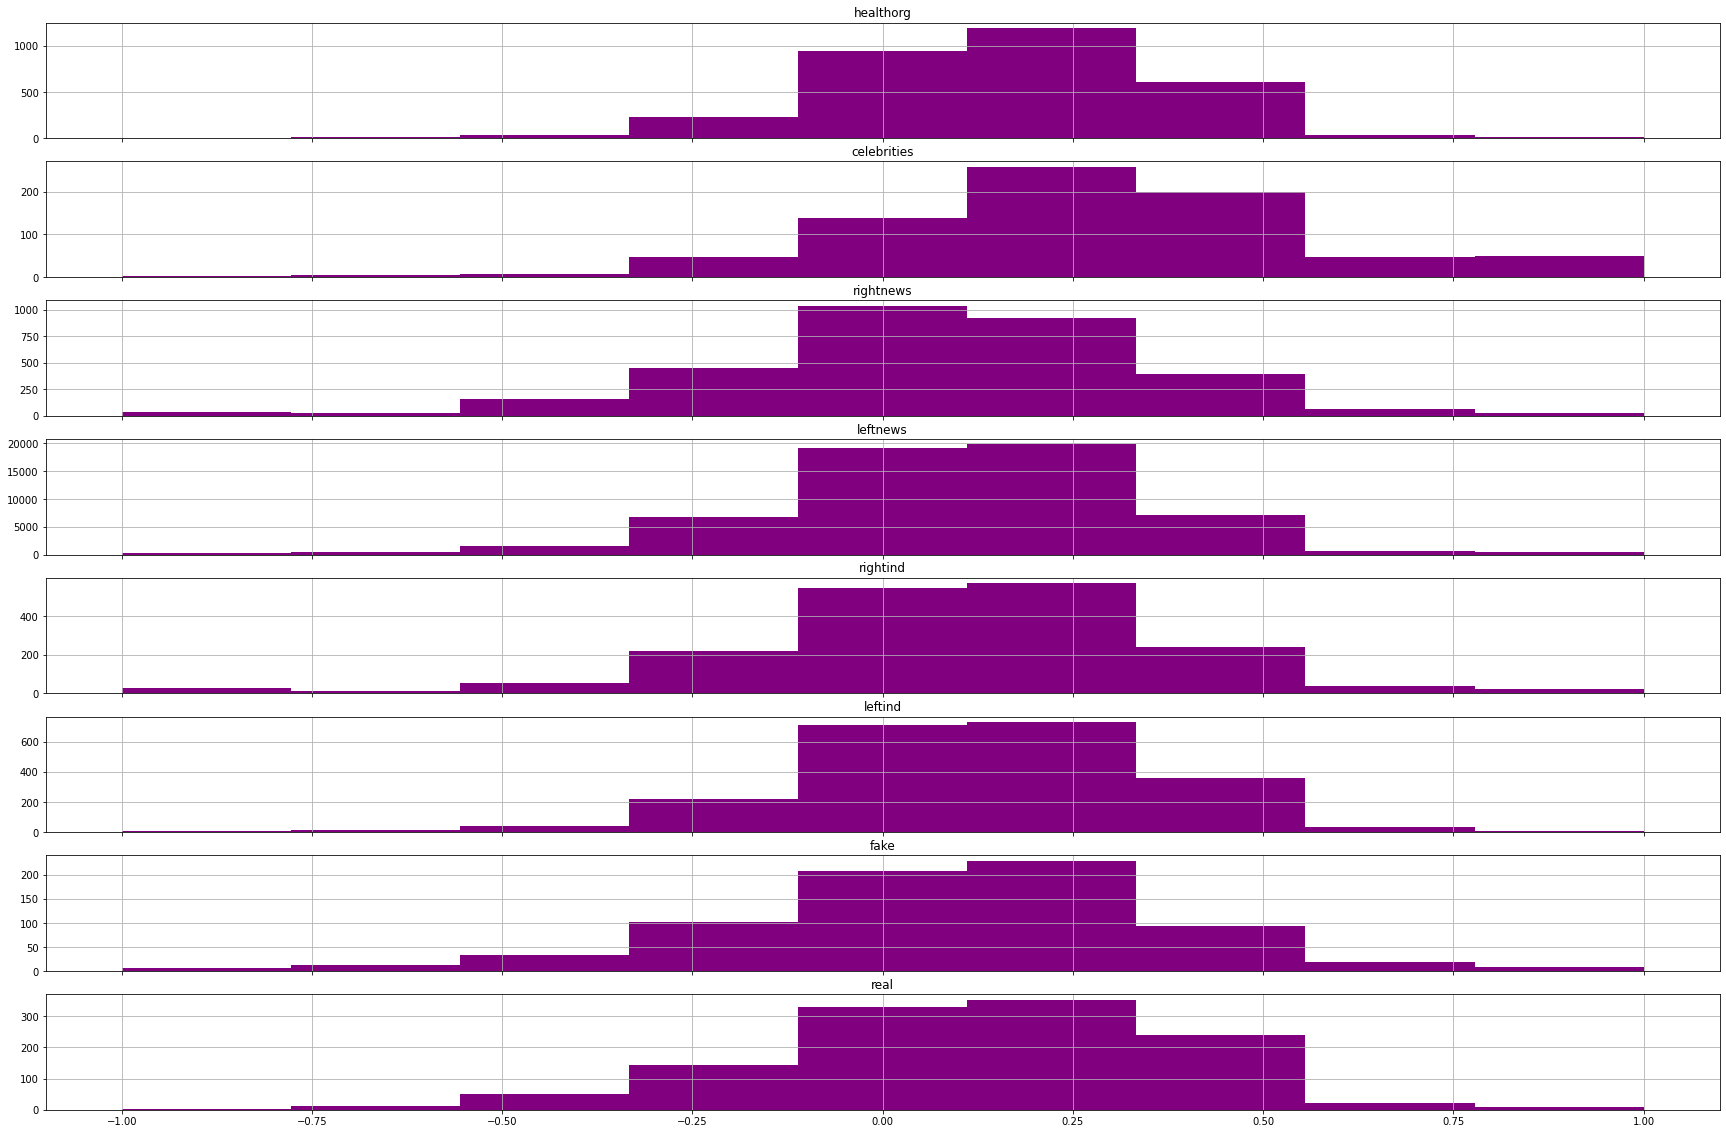

In [11]:
# histogram for overall sentiment

files = [healthorg, celebrities, rightnews, leftnews, rightind, leftind, fake, real]
names = ['healthorg', 'celebrities', 'rightnews', 'leftnews', 'rightind', 'leftind', 'fake', 'real']

fig, axes = plt.subplots(8, 1, figsize=[30, 20], sharex=True)
bins = np.linspace(-1, 1, 10)
for i in range(len(files)):
    col = files[i][files[i].polarity != 0].polarity
    col.hist(bins=bins, ax=axes[i], color="purple")
    axes[i].set_title(names[i])


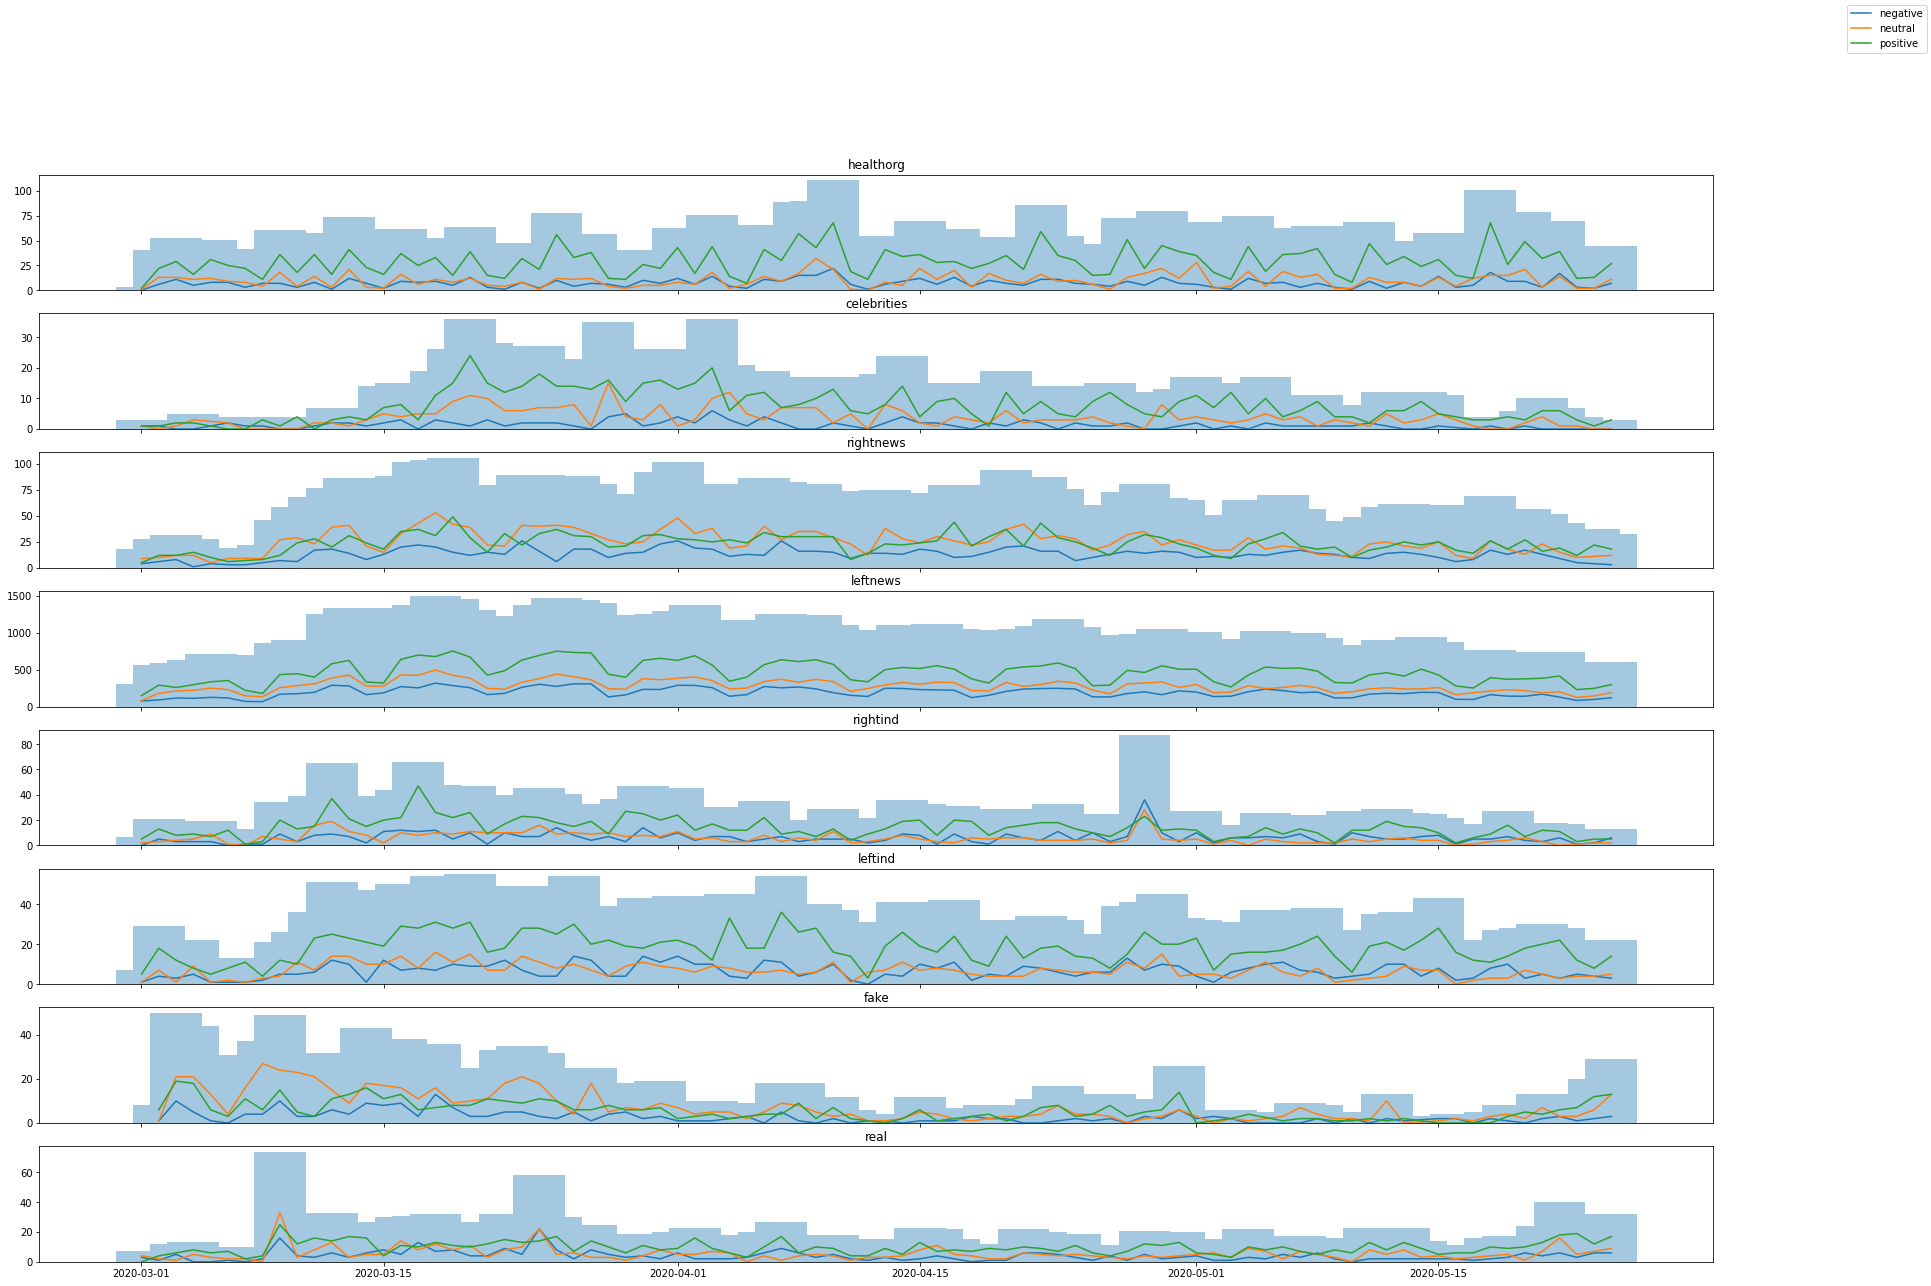

In [12]:
# plotting sentiment over time
# 1-day bins == overall # of tweets to see if magnitude contributes to sentiment spikes

import datetime
fig, axes = plt.subplots(8, 1, figsize=[30, 20], sharex=True)

for i in range(len(files)):
    if names[i] != 'fake':
        axes[i].plot(files[i].groupby("date").sentiment.value_counts().unstack(level=1).fillna(0))
        bins = pd.Series(index=files[i].date, data=np.array(files[i].count)).resample('1D').count()
        axes[i].bar(bins.index.sort_values(), bins, width=3, color = '#A5C8E1')
        axes[i].set_title(names[i])
    else: # because fake has a really large spike near March 1
        test = files[i][files[i].date > datetime.datetime(2020,3,1)]
        axes[i].plot(test.groupby("date").sentiment.value_counts().unstack(level=1).fillna(0))
        bins = pd.Series(index=test.date, data=np.array(test.count)).resample('1D').count()
        axes[i].bar(bins.index.sort_values(), bins, width=3, color = '#A5C8E1')
        axes[i].set_title(names[i])

fig.legend(files[0].groupby("date").sentiment.value_counts().unstack(level=1))

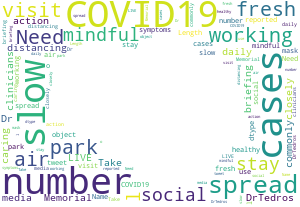

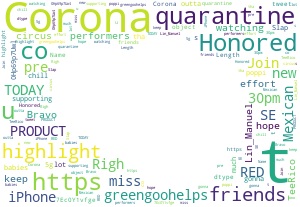

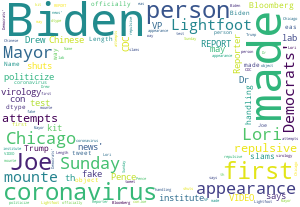

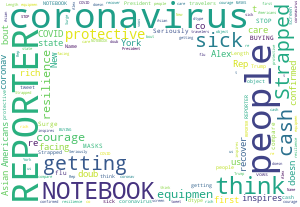

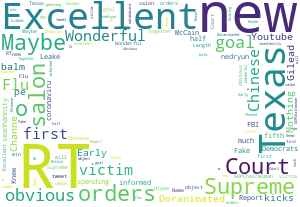

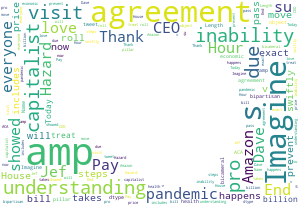

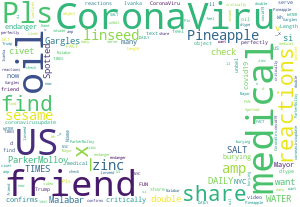

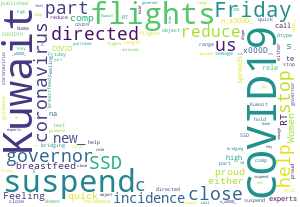

In [13]:
# word clouds

for i in range(len(files)):
    if "tweet" in files[i].columns:
        create_wordcloud(files[i].tweet, names[i])
    else:
        create_wordcloud(files[i].text, names[i])

In [22]:
healthorg = healthorg[healthorg["date"] <= pd.to_datetime('2020-04-30')]
healthorg = healthorg[healthorg["date"] >= pd.to_datetime('2020-03-01')]

leftnews = leftnews[leftnews["date"] <= pd.to_datetime('2020-04-30')]
leftnews = leftnews[leftnews["date"] >= pd.to_datetime('2020-03-01')]

rightnews = rightnews[rightnews["date"] <= pd.to_datetime('2020-04-30')]
rightnews = rightnews[rightnews["date"] >= pd.to_datetime('2020-03-01')]

rightind = rightind[rightind["date"] <= pd.to_datetime('2020-04-30')]
rightind = rightind[rightind["date"] >= pd.to_datetime('2020-03-01')]

leftind = leftind[leftind["date"] <= pd.to_datetime('2020-04-30')]
leftind = leftind[leftind["date"] >= pd.to_datetime('2020-03-01')]

celebrities = celebrities[celebrities["date"] <= pd.to_datetime('2020-04-30')]
celebrities = celebrities[celebrities["date"] >= pd.to_datetime('2020-03-01')]

fake = fake[fake["date"] <= pd.to_datetime('2020-04-30')]
fake = fake[fake["date"] >= pd.to_datetime('2020-03-01')]

real = real[real["date"] <= pd.to_datetime('2020-04-30')]
real = real[real["date"] >= pd.to_datetime('2020-03-01')]


In [23]:
bins = '3D'
healthorg = files[0].groupby("date").sentiment.value_counts().unstack(level=1).fillna(0)
healthorg_bins = healthorg.resample(bins).sum()
celebrities = files[1].groupby("date").sentiment.value_counts().unstack(level=1).fillna(0)
celebrities_bins = celebrities.resample(bins).sum()
rightnews = files[2].groupby("date").sentiment.value_counts().unstack(level=1).fillna(0)
rightnews_bins = rightnews.resample(bins).sum()
leftnews = files[3].groupby("date").sentiment.value_counts().unstack(level=1).fillna(0)
leftnews_bins = leftnews.resample(bins).sum()
rightind = files[4].groupby("date").sentiment.value_counts().unstack(level=1).fillna(0)
rightind_bins = rightind.resample(bins).sum()
leftind = files[5].groupby("date").sentiment.value_counts().unstack(level=1).fillna(0)
leftind_bins = leftind.resample(bins).sum()
fake = files[6].groupby("date").sentiment.value_counts().unstack(level=1).fillna(0)
fake_bins = fake.resample(bins).sum()
real = files[7].groupby("date").sentiment.value_counts().unstack(level=1).fillna(0)
real_bins = real.resample(bins).sum()

In [24]:
print('-----------------real vs health org-----------------')
print("positive")
krcc_test(real_bins['positive'], healthorg_bins['positive'])
print("neutral")
krcc_test(real_bins['neutral'], healthorg_bins['neutral'])
print("negative")
krcc_test(real_bins['negative'], healthorg_bins['negative'])

print('\n-----------------real vs celebrities-----------------')
print("positive")
krcc_test(real_bins['positive'], celebrities_bins['positive'])
print("neutral")
krcc_test(real_bins['neutral'], celebrities_bins['neutral'])
print("negative")
krcc_test(real_bins['negative'], celebrities_bins['negative'])

print('\n-----------------real vs rightnews-----------------')
print("positive")
krcc_test(real_bins['positive'], rightnews_bins['positive'])
print("neutral")
krcc_test(real_bins['neutral'], rightnews_bins['neutral'])
print("negative")
krcc_test(real_bins['negative'], rightnews_bins['negative'])

print('\n-----------------real vs leftnews-----------------')
print("positive")
krcc_test(real_bins['positive'], leftnews_bins['positive'])
print("neutral")
krcc_test(real_bins['neutral'], leftnews_bins['neutral'])
print("negative")
krcc_test(real_bins['negative'], leftnews_bins['negative'])

print('\n-----------------real vs rightind-----------------')
print("positive")
krcc_test(real_bins['positive'], rightind_bins['positive'])
print("neutral")
krcc_test(real_bins['neutral'], rightind_bins['neutral'])
print("negative")
krcc_test(real_bins['negative'], rightind_bins['negative'])

print('\n-----------------real vs leftind-----------------')
print("positive")
krcc_test(real_bins['positive'], leftind_bins['positive'])
print("neutral")
krcc_test(real_bins['neutral'], leftind_bins['neutral'])
print("negative")
krcc_test(real_bins['negative'], leftind_bins['negative'])

-----------------real vs health org-----------------
positive
KRCC = 0.13568524474994226
p value = 0.30962118628967283
neutral
KRCC = -0.09391135179474129
p value = 0.48552034468021854
negative
KRCC = 0.09450899509212972
p value = 0.4846800739574899

-----------------real vs celebrities-----------------
positive
KRCC = 0.07614213197969544
p value = 0.5716889785589374
neutral
KRCC = -0.017902813299232732
p value = 0.8948791555600693
negative
KRCC = 0.15707552218415138
p value = 0.2601661247700663

-----------------real vs rightnews-----------------
positive
KRCC = 0.3001320693650697
p value = 0.025080822757899888
neutral
KRCC = 0.1309973293821494
p value = 0.3275396188742927
negative
KRCC = 0.26396024105447885
p value = 0.04986816840324141

-----------------real vs leftnews-----------------
positive
KRCC = 0.3300371312660186
p value = 0.013068653079265441
neutral
KRCC = 0.13302230657142525
p value = 0.31857062289547655
negative
KRCC = 0.3529879017294286
p value = 0.007996749161438445

-